In [19]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01','2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


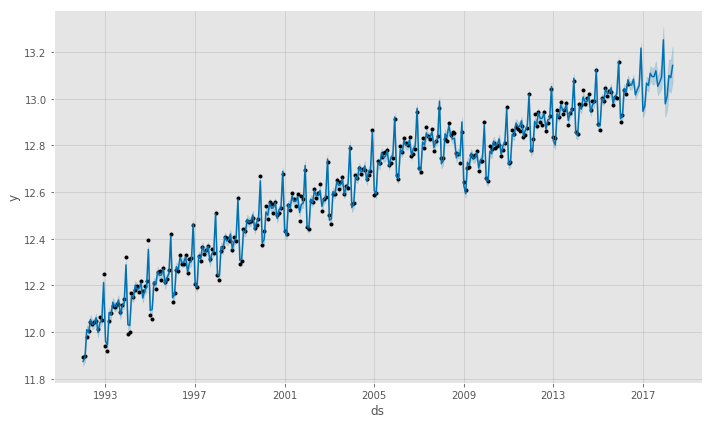

In [5]:
sales_df = pd.read_csv('../prophet-quickstart/examples/example_retail_sales.csv',parse_dates=True)
df = sales_df.reset_index()
df=df.rename(columns={'date':'ds', 'sales':'y'})
df['y'] = np.log(df['y'])
model = Prophet(holidays=promotions)
model.fit(df);
future = model.make_future_dataframe(periods=24, freq = 'm')
forecast = model.predict(future)
model.plot(forecast);